# Movie Dataset Analysis

Team Members: Akash Mishra , Rahul Bankey, Gopi Chand Yenkipalli, Surya Teja Pidakala ,Shanmukh Peela , Hiranmai Vallabhaneni 

In this project, we will be using a dataset containing movies information from Kaggle.

Business Objective: Our prediction task is to determine whether a movie will be a Superhit or a flop. We are given the input variables that include movie_title, Release_year, runtime, imdb_rating, imdb_votes,worldwide_gross, estimated budget, profit, movie_review . 

To conduct our analysis, we will utilize both a k-NN model and a Decition Tree model and we will perform k fold on K-NN model and Decision Tree.

# Step 1: Install and/or import necessary packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

np.random.seed(1)

# Step 2: Load, clean and prepare data for analysis

Read Data (Movies_data.csv)

In [2]:
movies_df = pd.read_csv('Movies_data.csv')
movies_df.head(20)

,MOVIE TITLE,RELEASE YEAR,RUNTIME,IMDB RATING,IMDB VOTES,WORLDWIDE GROSS,ESTIMATED BUDGET,PROFIT,MOVIE REVIEW
0,Avengers: Endgame,2019,181,8.4,748670,2797800564,356000000,2441800564,1
1,Avengers: Infinity War,2018,149,8.4,792818,2048709917,321000000,1727709917,0
2,Harry Potter and the Deathly Hallows: Part 2,2011,130,8.1,741462,1341511219,125000000,1216511219,0
3,The Lord of the Rings: The Return of the King,2003,201,8.9,1600809,1119929521,94000000,1025929521,0
4,Joker,2019,122,8.5,842794,1074251311,55000000,1019251311,0
5,Jurassic Park,1993,127,8.1,902597,1029153882,63000000,966153882,0
6,The Lion King,1994,88,8.5,977800,968483777,45000000,923483777,0
7,Toy Story 3,2010,103,8.3,738152,1068879522,200000000,868879522,0
8,Finding Nemo,2003,100,8.1,926000,936743261,94000000,842743261,1
9,The Dark Knight Rises,2012,164,8.4,1476788,1084939099,250000000,834939099,0


Explore the columns

In [3]:
movies_df.columns

Index(['MOVIE TITLE', 'RELEASE YEAR', 'RUNTIME', 'IMDB RATING', 'IMDB VOTES',
       'WORLDWIDE GROSS', 'ESTIMATED BUDGET', 'PROFIT', 'MOVIE REVIEW'],
      dtype='object')

 Cleaning and Transforming the data

In [4]:
movies_df.columns = [s.strip().upper().replace(' ', '_') for s in movies_df.columns] 

In [5]:
movies_df.columns

Index(['MOVIE_TITLE', 'RELEASE_YEAR', 'RUNTIME', 'IMDB_RATING', 'IMDB_VOTES',
       'WORLDWIDE_GROSS', 'ESTIMATED_BUDGET', 'PROFIT', 'MOVIE_REVIEW'],
      dtype='object')

In [6]:
movies_df.info

<bound method DataFrame.info of                                        MOVIE_TITLE  RELEASE_YEAR  RUNTIME  \
0                                Avengers: Endgame          2019      181   
1                           Avengers: Infinity War          2018      149   
2     Harry Potter and the Deathly Hallows: Part 2          2011      130   
3    The Lord of the Rings: The Return of the King          2003      201   
4                                            Joker          2019      122   
..                                             ...           ...      ...   
468                                    Mary Reilly          1996      108   
469                                    The Chamber          1996      113   
470                        Speed 2: Cruise Control          1997      121   
471                                     Braveheart          1995      178   
472                                       Hercules          1997       93   

     IMDB_RATING  IMDB_VOTES  WORLDWIDE_GRO

In [7]:
#dropping the irrelevant column
movies_df = movies_df.drop(columns=['MOVIE_TITLE'])

# check for missing values
movies_df.isnull().sum()

RELEASE_YEAR        0
RUNTIME             0
IMDB_RATING         0
IMDB_VOTES          0
WORLDWIDE_GROSS     0
ESTIMATED_BUDGET    0
PROFIT              0
MOVIE_REVIEW        0
dtype: int64

In [8]:
movies_df.dtypes

RELEASE_YEAR          int64
RUNTIME               int64
IMDB_RATING         float64
IMDB_VOTES            int64
WORLDWIDE_GROSS       int64
ESTIMATED_BUDGET      int64
PROFIT                int64
MOVIE_REVIEW          int64
dtype: object

In [9]:
movies_df.describe()

,RELEASE_YEAR,RUNTIME,IMDB_RATING,IMDB_VOTES,WORLDWIDE_GROSS,ESTIMATED_BUDGET,PROFIT,MOVIE_REVIEW
count,473.000000,473.000000,473.000000,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,473.000000
mean,1992.416490,118.183932,7.109302,2.944162e+05,1.762117e+08,4.090416e+07,1.353075e+08,0.253700
std,15.010092,24.555670,1.142087,4.035539e+05,2.509800e+08,4.131413e+07,2.243844e+08,0.435589
min,1926.000000,60.000000,3.200000,9.000000e+00,6.500000e+04,1.140000e+05,-8.419335e+07,0.000000
25%,1993.000000,101.000000,6.400000,4.159100e+04,3.640000e+07,1.500000e+07,1.538126e+07,0.000000
50%,1995.000000,115.000000,7.200000,1.210370e+05,1.084314e+08,3.000000e+07,6.688900e+07,0.000000
75%,1997.000000,130.000000,8.100000,3.427530e+05,2.139288e+08,5.500000e+07,1.590467e+08,1.000000
max,2019.000000,238.000000,9.300000,2.446424e+06,2.797801e+09,3.560000e+08,2.441801e+09,1.000000


# Step 3:Partitioning data into training and test data sets


We've decided to utilize a training/test split of the data at 70% training and 30% testing. This percentage split ratio is inline with common practice for small to medium sized datasets, which this data represents. Moreover, we have decided not to do a three way data split, as we are only testing two models and we wish to allocated as much data as possible to training and validation steps.

In [10]:
mtrain_df, mvalidation_df = train_test_split(movies_df, test_size=0.3, random_state=1)

In [11]:
mtrain_df.head()

,RELEASE_YEAR,RUNTIME,IMDB_RATING,IMDB_VOTES,WORLDWIDE_GROSS,ESTIMATED_BUDGET,PROFIT,MOVIE_REVIEW
244,2018,126,8.4,52444,65814181,4000000,61814181,0
187,1997,124,6.4,111706,159330280,60000000,99330280,0
325,1996,95,5.6,25239,57400547,30000000,27400547,0
98,2004,119,8.2,317521,235184110,24000000,211184110,0
224,1993,125,6.3,43922,107198790,35000000,72198790,0


In [12]:
mvalidation_df.head()

,RELEASE_YEAR,RUNTIME,IMDB_RATING,IMDB_VOTES,WORLDWIDE_GROSS,ESTIMATED_BUDGET,PROFIT,MOVIE_REVIEW
179,1998,97,6.9,140401,123306987,18000000,105306987,0
298,1994,142,9.3,2446424,58500000,25000000,33500000,0
31,1993,125,7.0,254341,441286195,25000000,416286195,0
453,1996,98,5.4,8860,2800000,25000000,-22200000,1
247,2018,139,8.3,64955,65276927,4500000,60776927,0


# Step 4: Address any data imbalances

We will utilize an oversamplying technique to address any necessary date balancing.

In [13]:
target = 'MOVIE_REVIEW'
predictors = list(movies_df.columns)
predictors.remove(target)
RanOverSample=RandomOverSampler(sampling_strategy=1)
pred,tar = RanOverSample.fit_resample(mtrain_df[predictors],mtrain_df[target])
tar.value_counts()

0    244
1    244
Name: MOVIE_REVIEW, dtype: int64

In [14]:
predictors

['RELEASE_YEAR',
 'RUNTIME',
 'IMDB_RATING',
 'IMDB_VOTES',
 'WORLDWIDE_GROSS',
 'ESTIMATED_BUDGET',
 'PROFIT']

In [15]:
target

'MOVIE_REVIEW'

Scaling the dataset

In [16]:
# creating a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(mtrain_df[predictors])

StandardScaler()

In [17]:
# Transforming the predictors of training and validation sets
train_predictors = scaler.transform(mtrain_df[predictors]) 
train_target = mtrain_df[target] 

validation_predictors = scaler.transform(mvalidation_df[predictors]) 
validation_target = mvalidation_df[target] 

In [18]:
print(train_predictors[:5], end="\n\n")

[[ 1.71975223  0.37322995  1.14312692 -0.60815037 -0.4253395  -0.84378374
  -0.32495758]
 [ 0.32162384  0.29168598 -0.57950003 -0.45649421 -0.07457679  0.43862526
  -0.16570589]
 [ 0.2550463  -0.89070158 -1.26855081 -0.67777013 -0.45689758 -0.24837956
  -0.47103964]
 [ 0.78766664  0.08782606  0.97086422  0.07020271  0.2099378  -0.38578053
   0.30910121]
 [ 0.05531367  0.33245797 -0.66563138 -0.62995885 -0.27011299 -0.13387876
  -0.28087606]]



In [19]:
print(np.array(train_target[:5]), end="\n\n")


[0 0 0 0 0]



In [20]:
print(validation_predictors[:5], end="\n\n")


[[ 0.38820138 -0.80915761 -0.1488433  -0.38306143 -0.20969393 -0.52318149
  -0.14033544]
 [ 0.12189121  1.02558171  1.91830904  5.51823444 -0.45277373 -0.36288037
  -0.44514813]
 [ 0.05531367  0.33245797 -0.06271195 -0.09147993  0.98299107 -0.36288037
   1.17973682]
 [ 0.2550463  -0.76838562 -1.44081351 -0.71968529 -0.66169479 -0.36288037
  -0.68158846]
 [ 1.71975223  0.90326575  1.05699557 -0.57613373 -0.42735465 -0.83233366
  -0.3293606 ]]



In [21]:
print(np.array(validation_target[:5]), end="\n\n")

[0 0 0 1 0]



In [22]:
mtrain_df.index 

Int64Index([244, 187, 325,  98, 224, 330, 441, 271, 242, 127,
            ...
            448, 335, 133, 203, 393, 255,  72, 396, 235,  37],
           dtype='int64', length=331)

# Train a k-NN model 

Since we know the k-NN models are very sensitive to differences in scale, we have rescaled our variables before fitting the model.

Creating a knn object with default parameters and using k as 23, as it is the root of the dataset values

In [23]:
knn = KNeighborsClassifier(n_neighbors=13,  metric='euclidean') 
knn.fit(train_predictors, train_target)
knn_prediction_output = knn.predict(validation_predictors)
knn_prediction_output

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [24]:
knn_predict_proba_output = knn.predict_proba(validation_predictors)
knn_predict_proba_output[:100, 1].round(2)

array([0.08, 0.77, 0.08, 0.08, 0.15, 0.  , 0.08, 0.38, 0.08, 0.  , 0.23,
       0.69, 0.15, 0.23, 0.31, 0.69, 0.  , 0.54, 0.69, 0.08, 0.46, 0.08,
       0.08, 0.62, 0.08, 0.08, 0.15, 0.  , 0.23, 0.69, 0.  , 0.23, 0.31,
       0.  , 0.  , 0.08, 0.23, 0.46, 0.23, 0.54, 0.  , 0.  , 0.  , 0.54,
       0.69, 0.  , 0.08, 0.23, 0.  , 0.  , 0.23, 0.38, 0.23, 0.54, 0.08,
       0.08, 0.  , 0.08, 0.46, 0.15, 0.08, 0.23, 0.85, 0.15, 0.15, 0.08,
       0.31, 0.15, 0.  , 0.77, 0.92, 0.54, 0.77, 0.23, 0.23, 0.31, 0.38,
       0.  , 0.  , 0.31, 0.69, 0.31, 0.54, 0.15, 0.15, 0.  , 0.08, 0.23,
       0.23, 0.69, 0.23, 0.08, 0.62, 0.08, 0.08, 0.08, 0.08, 0.  , 0.23,
       0.85])

In [25]:
unique, counts = np.unique(knn_prediction_output, return_counts=True)
dict(zip(unique, counts))

{0: 112, 1: 30}

In [26]:
threshold = 0.1
#knn.fit(train_predictors, train_target)
knn_prediction_output = (knn.predict_proba(validation_predictors)[:,1]>=threshold).astype(int)
unique, counts = np.unique(knn_prediction_output, return_counts=True)


dict(zip(unique, counts))

{0: 57, 1: 85}

In [27]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(validation_target, knn_prediction_output)
confusion

array([[53, 56],
       [ 4, 29]], dtype=int64)

Creation of the confusion matrix

In [28]:
TP = confusion[1, 1] # True Positives
TN = confusion[0, 0] # True Negatives
FP = confusion[0, 1] # False Positives
FN = confusion[1, 0] # False Negatives

In [29]:
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"{classification_accuracy:.4f}")

0.5775


In [30]:
classification_error = (FP + FN) / (TP + TN + FP + FN)
# this is the same as ...
# classification_error = 1-classification_accuracy

print(f"{classification_error:.4f}")

0.4225


In [31]:
precision = TP / (TP + FP)
print(f"{precision:.4f}")

0.3412


In [32]:
recall = TP / (TP + FN)
print(f"{recall:.4f}")

0.8788


In [33]:
f1_Score = (2 * precision * recall) / (precision + recall)
print(f"{f1_Score:.4f}")

0.4915


Checking all the values in the range from 1 to 42

In [34]:
accuracy = []
f1 = []
for i in range(1,42,2):
    knn = KNeighborsClassifier(n_neighbors=i,  metric='euclidean')
    knn.fit(train_predictors, train_target)
#    knn_prediction_output = knn.predict(validation_predictors)
    knn_prediction_output = (knn.predict_proba(validation_predictors)[:,1]>=threshold).astype(int)
    confusion = confusion_matrix(validation_target, knn_prediction_output)
    TP = confusion[1, 1] 
    TN = confusion[0, 0] 
    FP = confusion[0, 1] 
    FN = confusion[1, 0] 
    classification_accuracy = (TP + TN)/(TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    classification_f1= (2 * precision * recall) / (precision + recall)
    print(f"for k = {i} model profit accuracy is {classification_accuracy*100:,.4f}")
    print(f"for k = {i} model profit f1 is {classification_f1*100:,.4f}")

for k = 1 model profit accuracy is 70.4225
for k = 1 model profit f1 is 48.7805
for k = 3 model profit accuracy is 61.9718
for k = 3 model profit f1 is 48.0769
for k = 5 model profit accuracy is 55.6338
for k = 5 model profit f1 is 45.2174
for k = 7 model profit accuracy is 46.4789
for k = 7 model profit f1 is 41.5385
for k = 9 model profit accuracy is 46.4789
for k = 9 model profit f1 is 43.2836
for k = 11 model profit accuracy is 58.4507
for k = 11 model profit f1 is 48.6957
for k = 13 model profit accuracy is 57.7465
for k = 13 model profit f1 is 49.1525
for k = 15 model profit accuracy is 50.0000
for k = 15 model profit f1 is 44.9612
for k = 17 model profit accuracy is 47.8873
for k = 17 model profit f1 is 45.5882
for k = 19 model profit accuracy is 44.3662
for k = 19 model profit f1 is 44.7552
for k = 21 model profit accuracy is 52.8169
for k = 21 model profit f1 is 46.4000
for k = 23 model profit accuracy is 50.7042
for k = 23 model profit f1 is 45.3125
for k = 25 model profit ac

# K Fold Cross Validation for K NN

As we can see from the confusion matrix that the values for TP,FP,FN,TN has a lot of difference, we are taking 'f1_score'as it is the most contributing metric. 

In [35]:
score_measure = 'f1'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,143,2)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_predictors, train_target)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_ 

f1 score:  0.6208903514785867
parameters:  {'metric': 'cosine', 'n_neighbors': 29}


# Decision Tree

In [36]:
movies_df

,RELEASE_YEAR,RUNTIME,IMDB_RATING,IMDB_VOTES,WORLDWIDE_GROSS,ESTIMATED_BUDGET,PROFIT,MOVIE_REVIEW
0,2019,181,8.4,748670,2797800564,356000000,2441800564,1
1,2018,149,8.4,792818,2048709917,321000000,1727709917,0
2,2011,130,8.1,741462,1341511219,125000000,1216511219,0
3,2003,201,8.9,1600809,1119929521,94000000,1025929521,0
4,2019,122,8.5,842794,1074251311,55000000,1019251311,0
...,...,...,...,...,...,...,...,...
468,1996,108,5.8,14573,12272308,47000000,-34727692,1
469,1996,113,6.0,14749,7989000,50000000,-42011000,0
470,1997,121,3.9,78231,115900000,160000000,-44100000,0
471,1995,178,8.3,984603,4259710,72000000,-67740290,0


In [37]:
X = movies_df[predictors]
X

,RELEASE_YEAR,RUNTIME,IMDB_RATING,IMDB_VOTES,WORLDWIDE_GROSS,ESTIMATED_BUDGET,PROFIT
0,2019,181,8.4,748670,2797800564,356000000,2441800564
1,2018,149,8.4,792818,2048709917,321000000,1727709917
2,2011,130,8.1,741462,1341511219,125000000,1216511219
3,2003,201,8.9,1600809,1119929521,94000000,1025929521
4,2019,122,8.5,842794,1074251311,55000000,1019251311
...,...,...,...,...,...,...,...
468,1996,108,5.8,14573,12272308,47000000,-34727692
469,1996,113,6.0,14749,7989000,50000000,-42011000
470,1997,121,3.9,78231,115900000,160000000,-44100000
471,1995,178,8.3,984603,4259710,72000000,-67740290


In [38]:
y = movies_df[target]
y

0      1
1      0
2      0
3      0
4      0
      ..
468    1
469    0
470    0
471    0
472    0
Name: MOVIE_REVIEW, Length: 473, dtype: int64

In [39]:
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size = 0.3,random_state = 1)

Creating the decision tree using the default parameters

In [40]:
dtree = DecisionTreeClassifier(random_state = 1)

Fitting the model to train the dataset

In [41]:
dtree.fit(train_X,train_y)

DecisionTreeClassifier(random_state=1)

Review of the performance of the model on the validation/test data

In [42]:
validation_predictions = dtree.predict(valid_X)

print('Confusion Matrix: ', confusion_matrix(valid_y, validation_predictions))
print('Accuracy score: ', accuracy_score(valid_y, validation_predictions))
print('Precision score: ', precision_score(valid_y, validation_predictions))
print('Recall score: ', recall_score(valid_y, validation_predictions))
print('F1 Score: \n', f1_score(valid_y, validation_predictions))

Confusion Matrix:  [[87 22]
 [15 18]]
Accuracy score:  0.7394366197183099
Precision score:  0.45
Recall score:  0.5454545454545454
F1 Score: 
 0.4931506849315069


In [43]:
train_predictions = dtree.predict(train_X)

print('Confusion Matrix:\n', confusion_matrix(train_y, train_predictions))
print('Accuracy score:\n', accuracy_score(train_y, train_predictions))
print('Precision score:\n', precision_score(train_y, train_predictions))
print('Recall score:\n', recall_score(train_y, train_predictions))
print('F1 Score: \n', f1_score(train_y, train_predictions))

Confusion Matrix:
 [[244   0]
 [  0  87]]
Accuracy score:
 1.0
Precision score:
 1.0
Recall score:
 1.0
F1 Score: 
 1.0


In [44]:
print(classification_report(valid_y, dtree.predict(valid_X), target_names=['1','0']))

              precision    recall  f1-score   support

           1       0.85      0.80      0.82       109
           0       0.45      0.55      0.49        33

    accuracy                           0.74       142
   macro avg       0.65      0.67      0.66       142
weighted avg       0.76      0.74      0.75       142



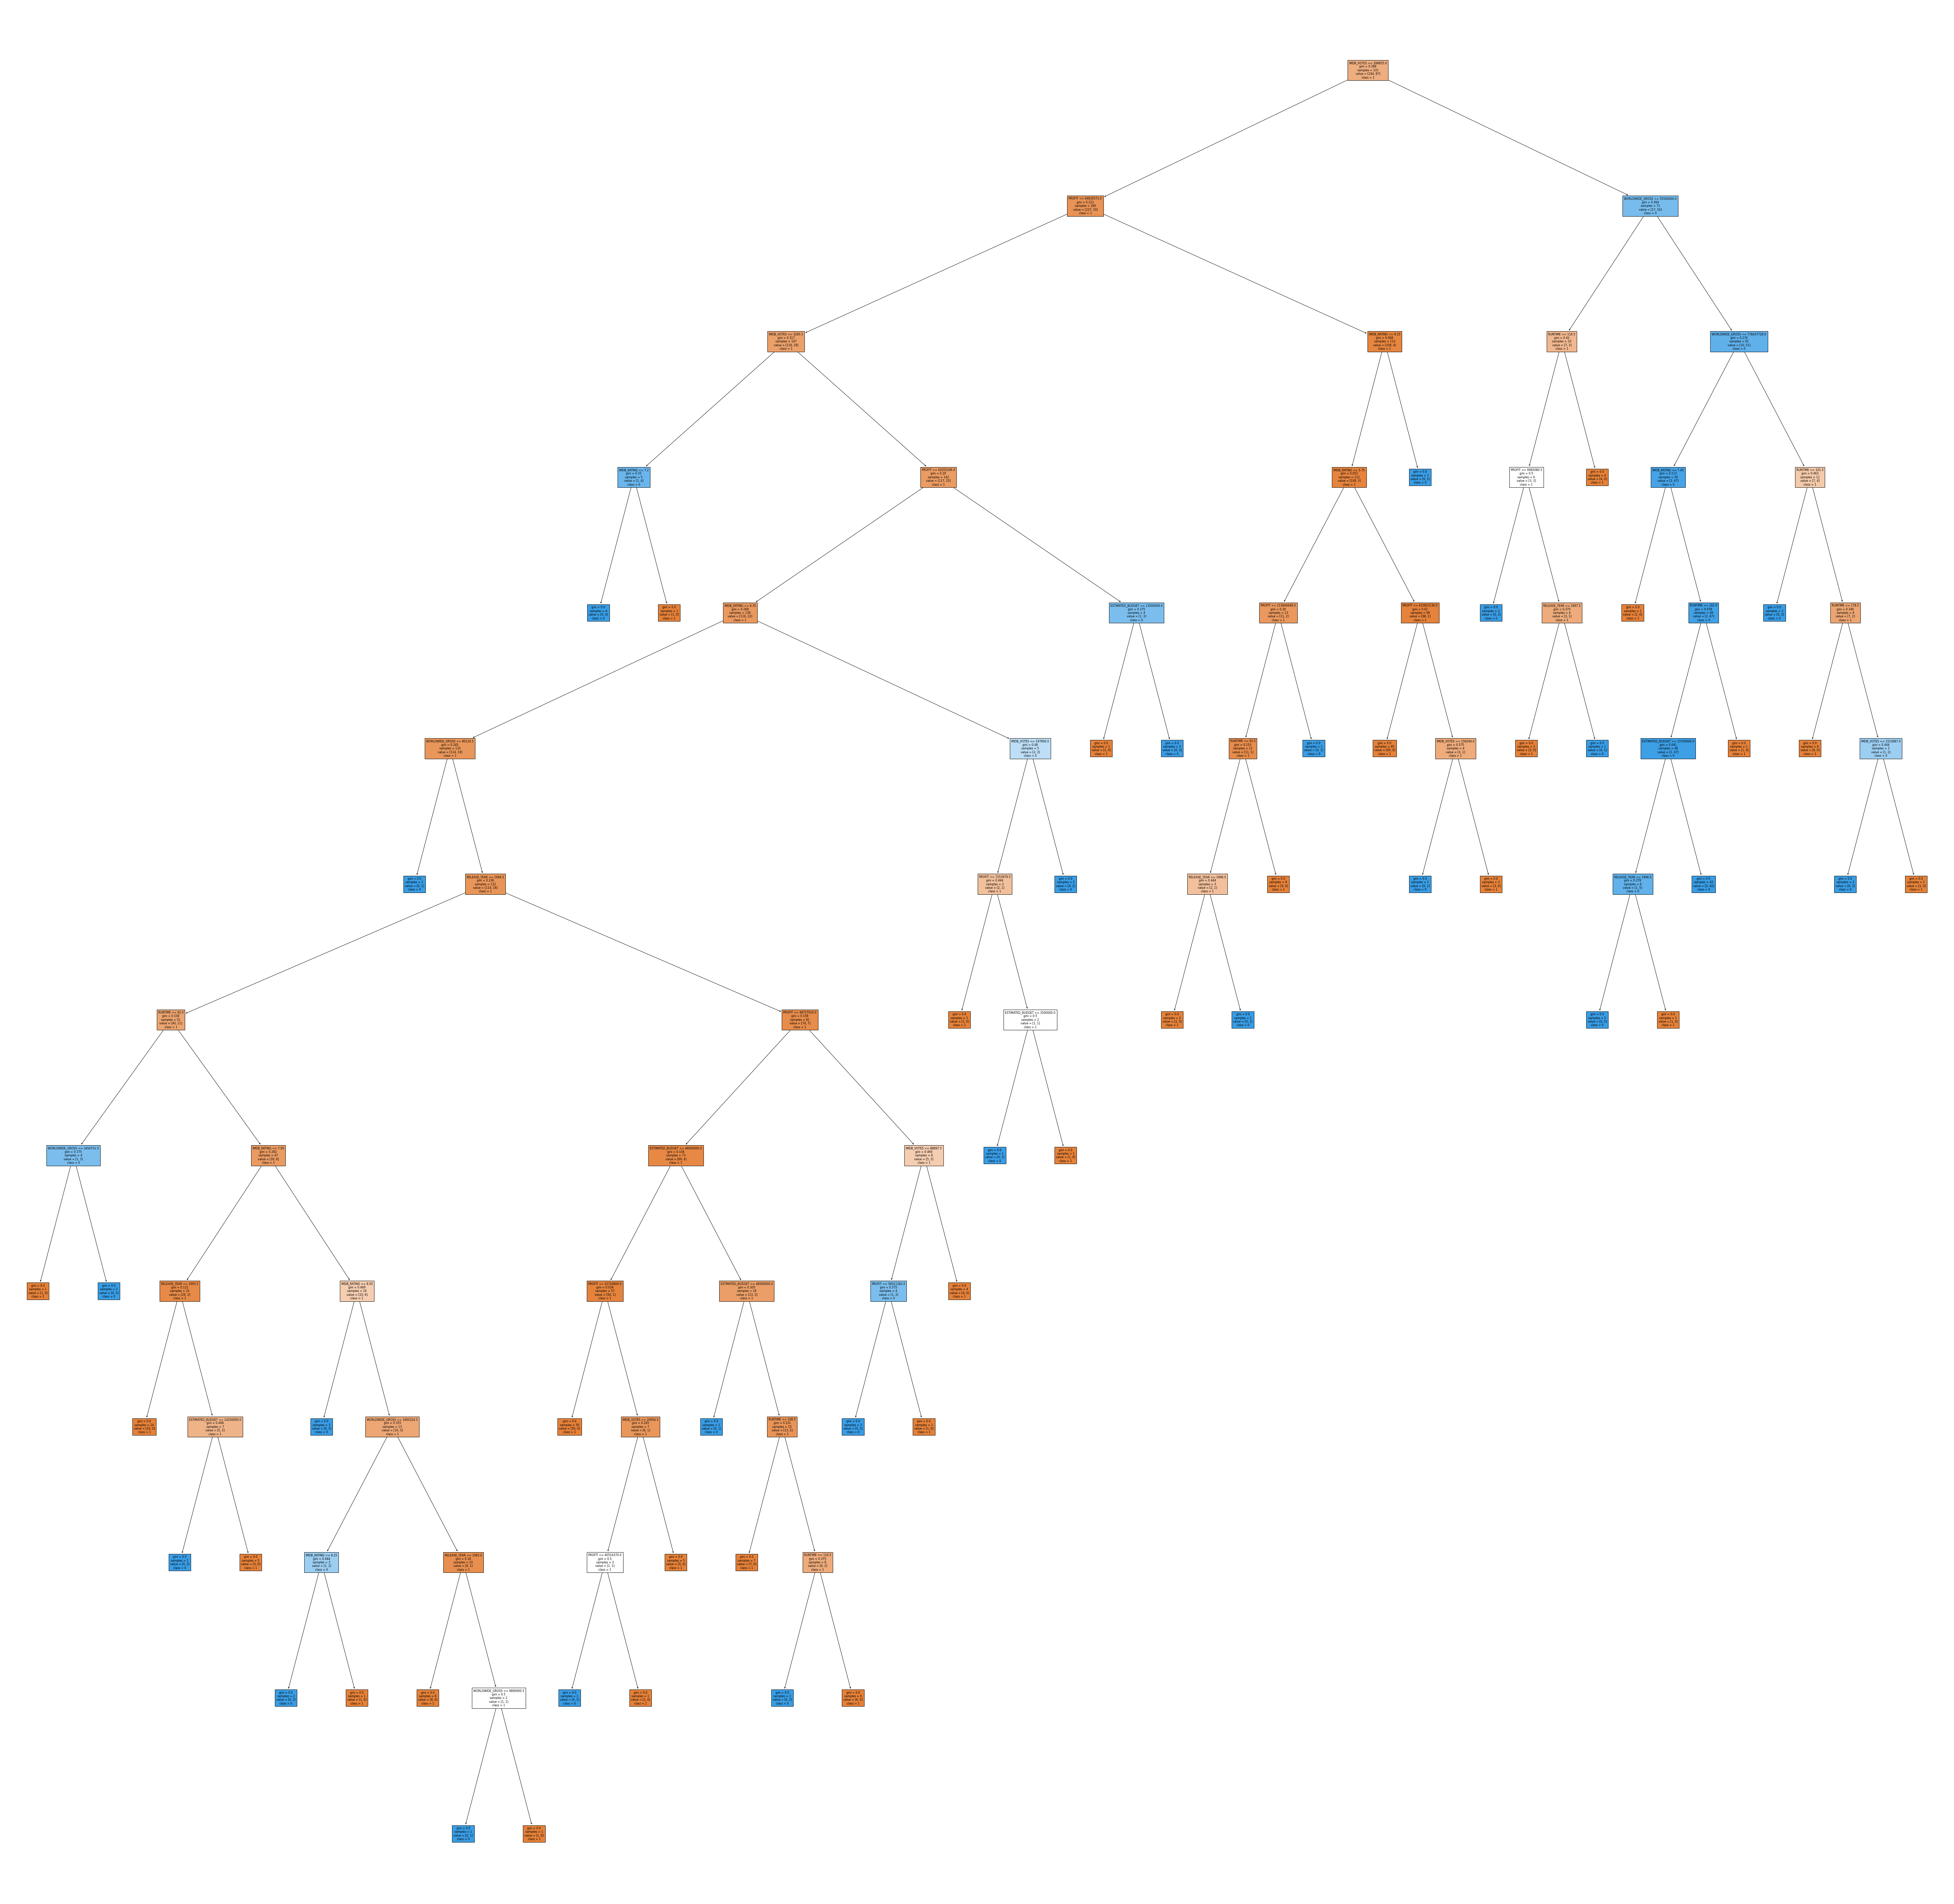

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,100))
_ = plot_tree(dtree, 
                feature_names=X.columns,  
                class_names=['1', '0'],
                filled=True,
                fontsize=8
             )

In [46]:
from sklearn.tree import export_text

text_representation = export_text(dtree)

print(text_representation)

|--- feature_3 <= 398855.00
|   |--- feature_6 <= 64830572.00
|   |   |--- feature_3 <= 3285.50
|   |   |   |--- feature_2 <= 7.20
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  7.20
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  3285.50
|   |   |   |--- feature_6 <= 62055296.00
|   |   |   |   |--- feature_2 <= 8.35
|   |   |   |   |   |--- feature_4 <= 80124.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  80124.50
|   |   |   |   |   |   |--- feature_0 <= 1994.50
|   |   |   |   |   |   |   |--- feature_1 <= 92.00
|   |   |   |   |   |   |   |   |--- feature_4 <= 3454731.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_4 >  3454731.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  92.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 7.95
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 1993.50
|   |   |   |   |   |   |   |   | 

The accuracy of the model using the Knn technique is 50.70, the error is 49.3 and the precision is 30.53 with recall is 87.88 and f1_score is 45.31. We used the value of k to be the root of the total values but the best accuracy by Knn came out with k = 1 having accuracy 70.4225

Apart from this The accuracy of the model using the decision tree technique for validation is 73.9, the precision is 45 with recall 54.54 and f1_score is 49.3. The accuracy of the model using the Decision tree technique is 1, the error is 1 and the precision is 1 with recall 1 and f1_score is 1.

It is easily seen from the above conclusions that Decision Tree outperforms Knn Technique and has a better accuracy score.

## K Fold Cross Validation for Decision Tree

In [47]:
treeClassifier = DecisionTreeClassifier(random_state=1) #defining model
scores = cross_val_score(treeClassifier, train_X, train_y, cv=10)
scores.mean()

0.7731729055258467

In [48]:
precision = cross_val_score(treeClassifier, train_X, train_y, cv=10, scoring='precision')
precision.mean()

0.5584559884559883

In [49]:
recall = cross_val_score(treeClassifier, train_X, train_y, cv=10, scoring='recall')
recall.mean()

0.6319444444444444

In [50]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyTree = gridSearch.best_estimator_

accuracy score:  0.8517825311942959
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_split': 2}


In [51]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionTree = gridSearch.best_estimator_

precision score:  0.9125
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_split': 2}


In [52]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecallTree = gridSearch.best_estimator_

recall score:  0.6347222222222223
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 80}


In [53]:
print("Best Accuracy Tree")
print(classification_report(valid_y, bestAccuracyTree.predict(valid_X)))

Best Accuracy Tree
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       109
           1       0.74      0.61      0.67        33

    accuracy                           0.86       142
   macro avg       0.81      0.77      0.79       142
weighted avg       0.85      0.86      0.85       142



In [54]:
print("Best Precision Tree")
print(classification_report(valid_y, bestPrecisionTree.predict(valid_X)))

Best Precision Tree
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       109
           1       0.74      0.61      0.67        33

    accuracy                           0.86       142
   macro avg       0.81      0.77      0.79       142
weighted avg       0.85      0.86      0.85       142



Visualizing the Decision tree

In [55]:
print("Best Recall Tree")
print(classification_report(valid_y, bestRecallTree.predict(valid_X)))

Best Recall Tree
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       109
           1       0.55      0.70      0.61        33

    accuracy                           0.80       142
   macro avg       0.72      0.76      0.74       142
weighted avg       0.82      0.80      0.80       142



# Best Accuracy tree

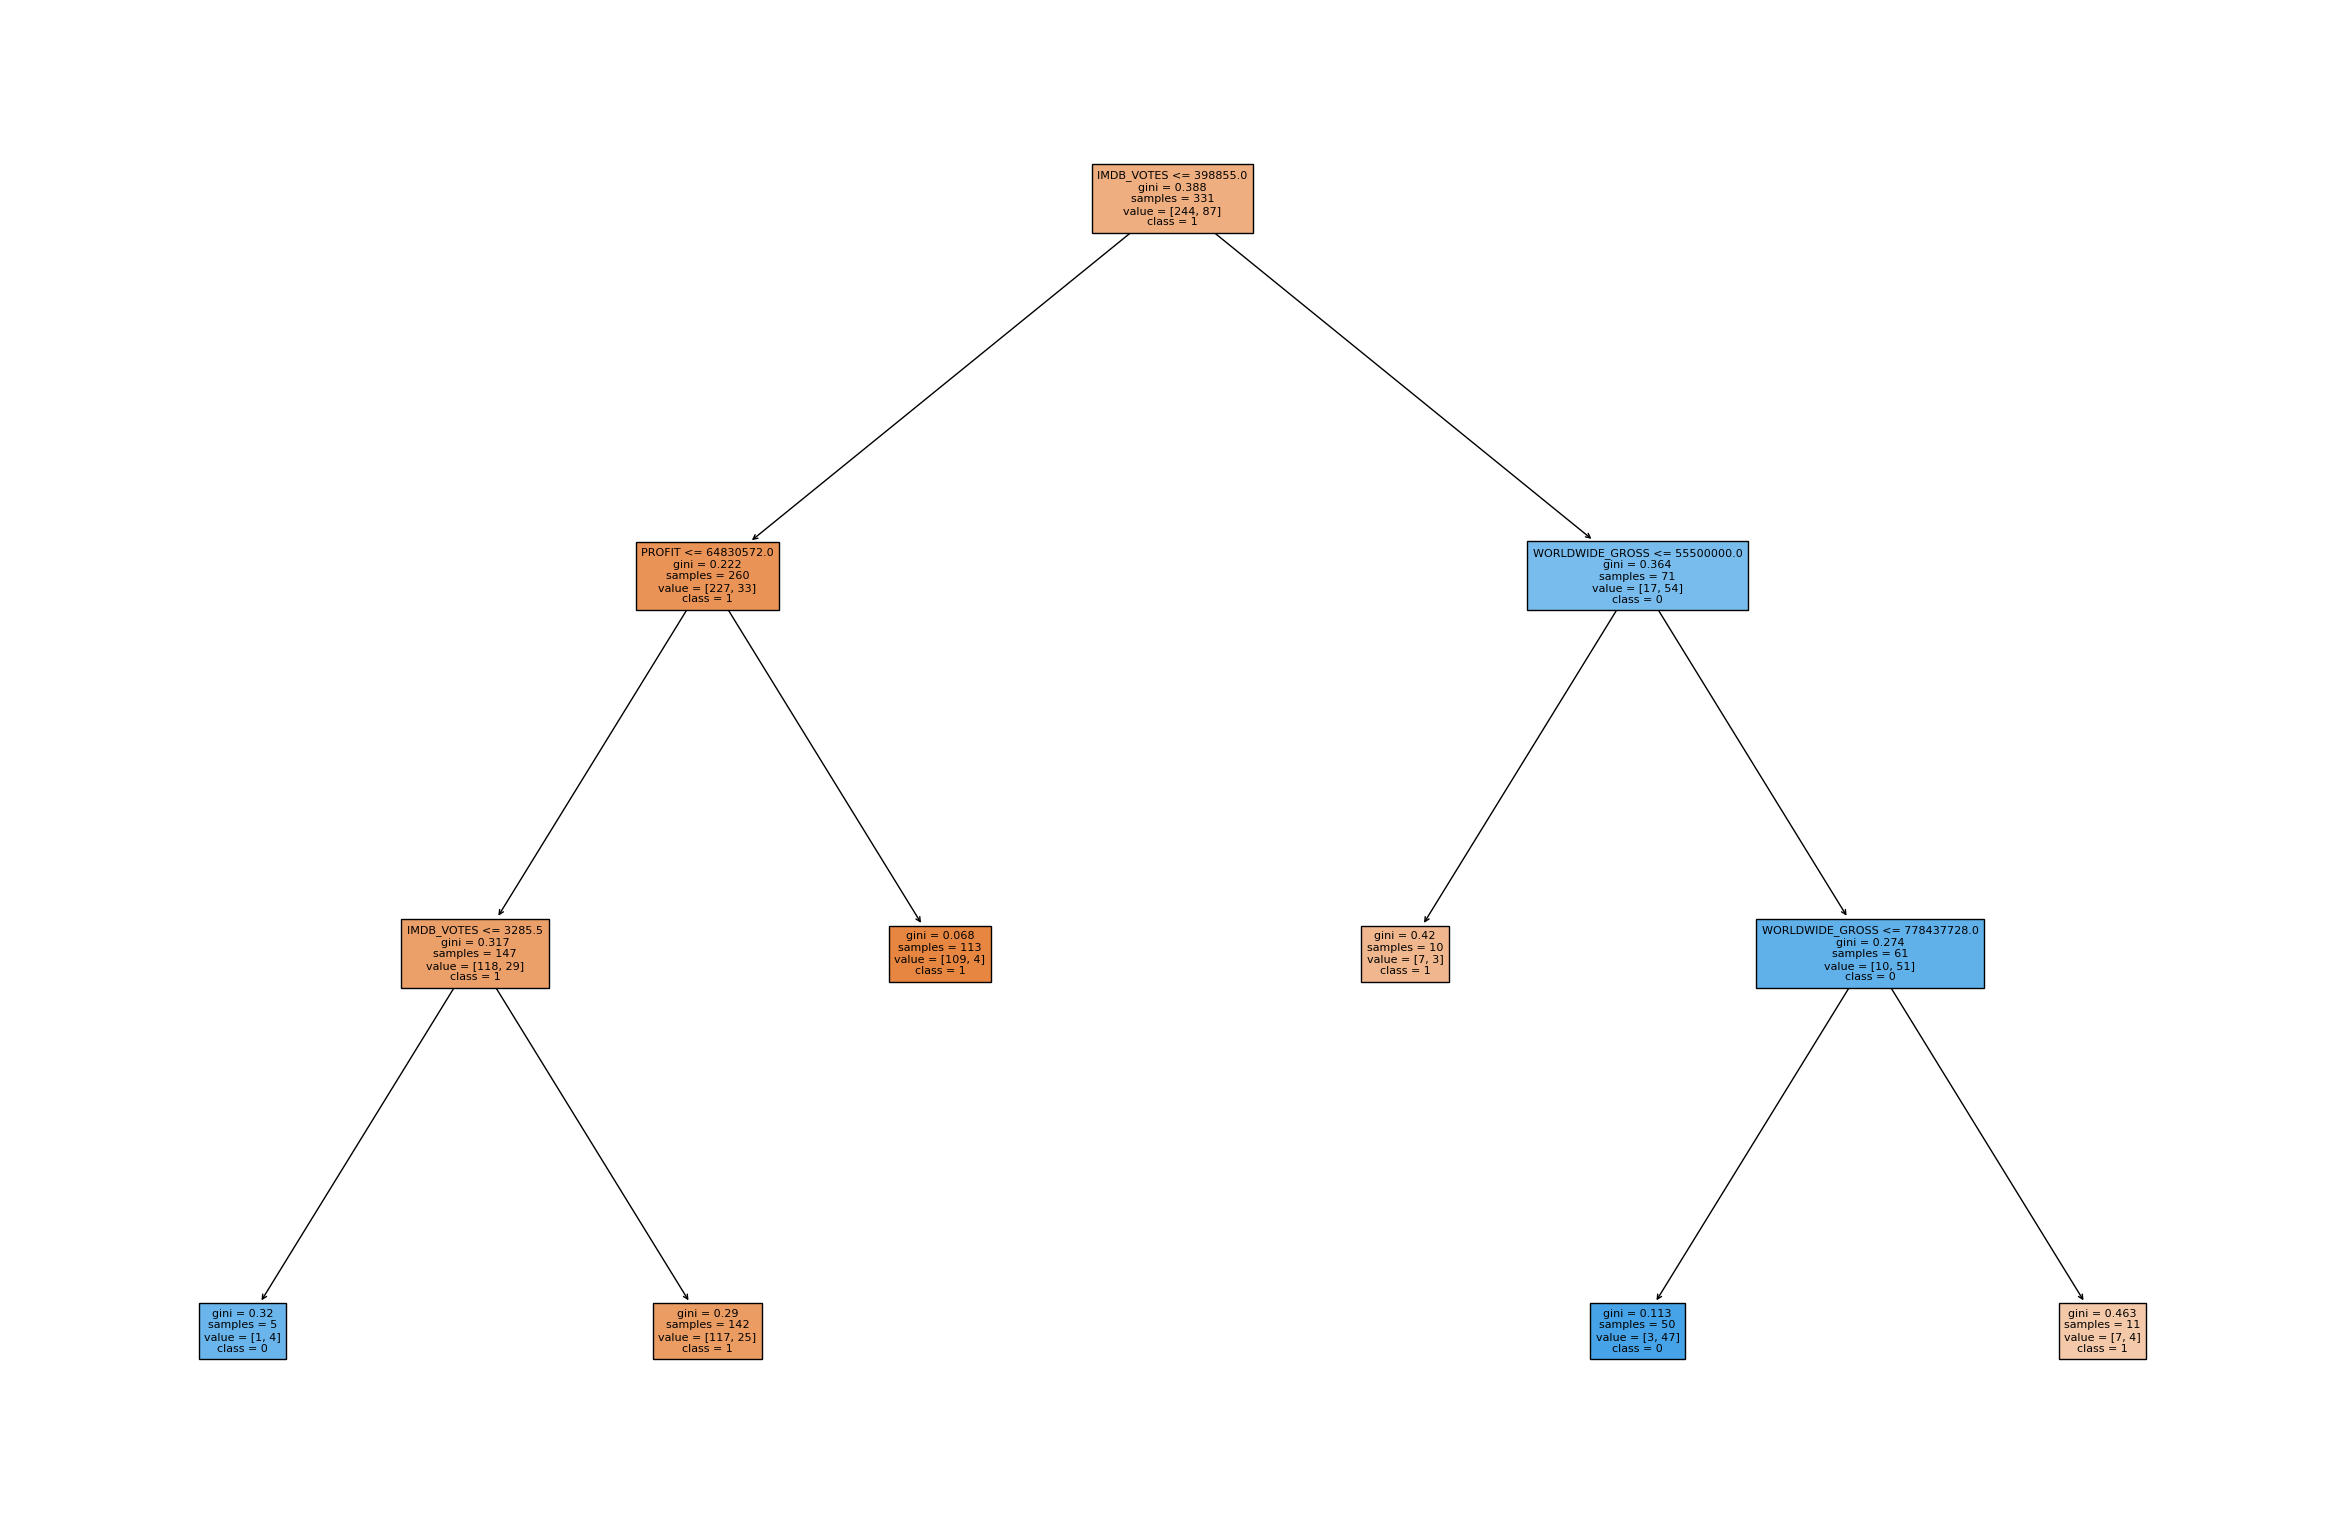

In [56]:

fig = plt.figure(figsize=(30,20), dpi=100)
_ = plot_tree(bestAccuracyTree, 
                feature_names=movies_df.columns,  
                class_names=['1','0'],
                filled=True,
                fontsize=8
             )

# Best Precision tree

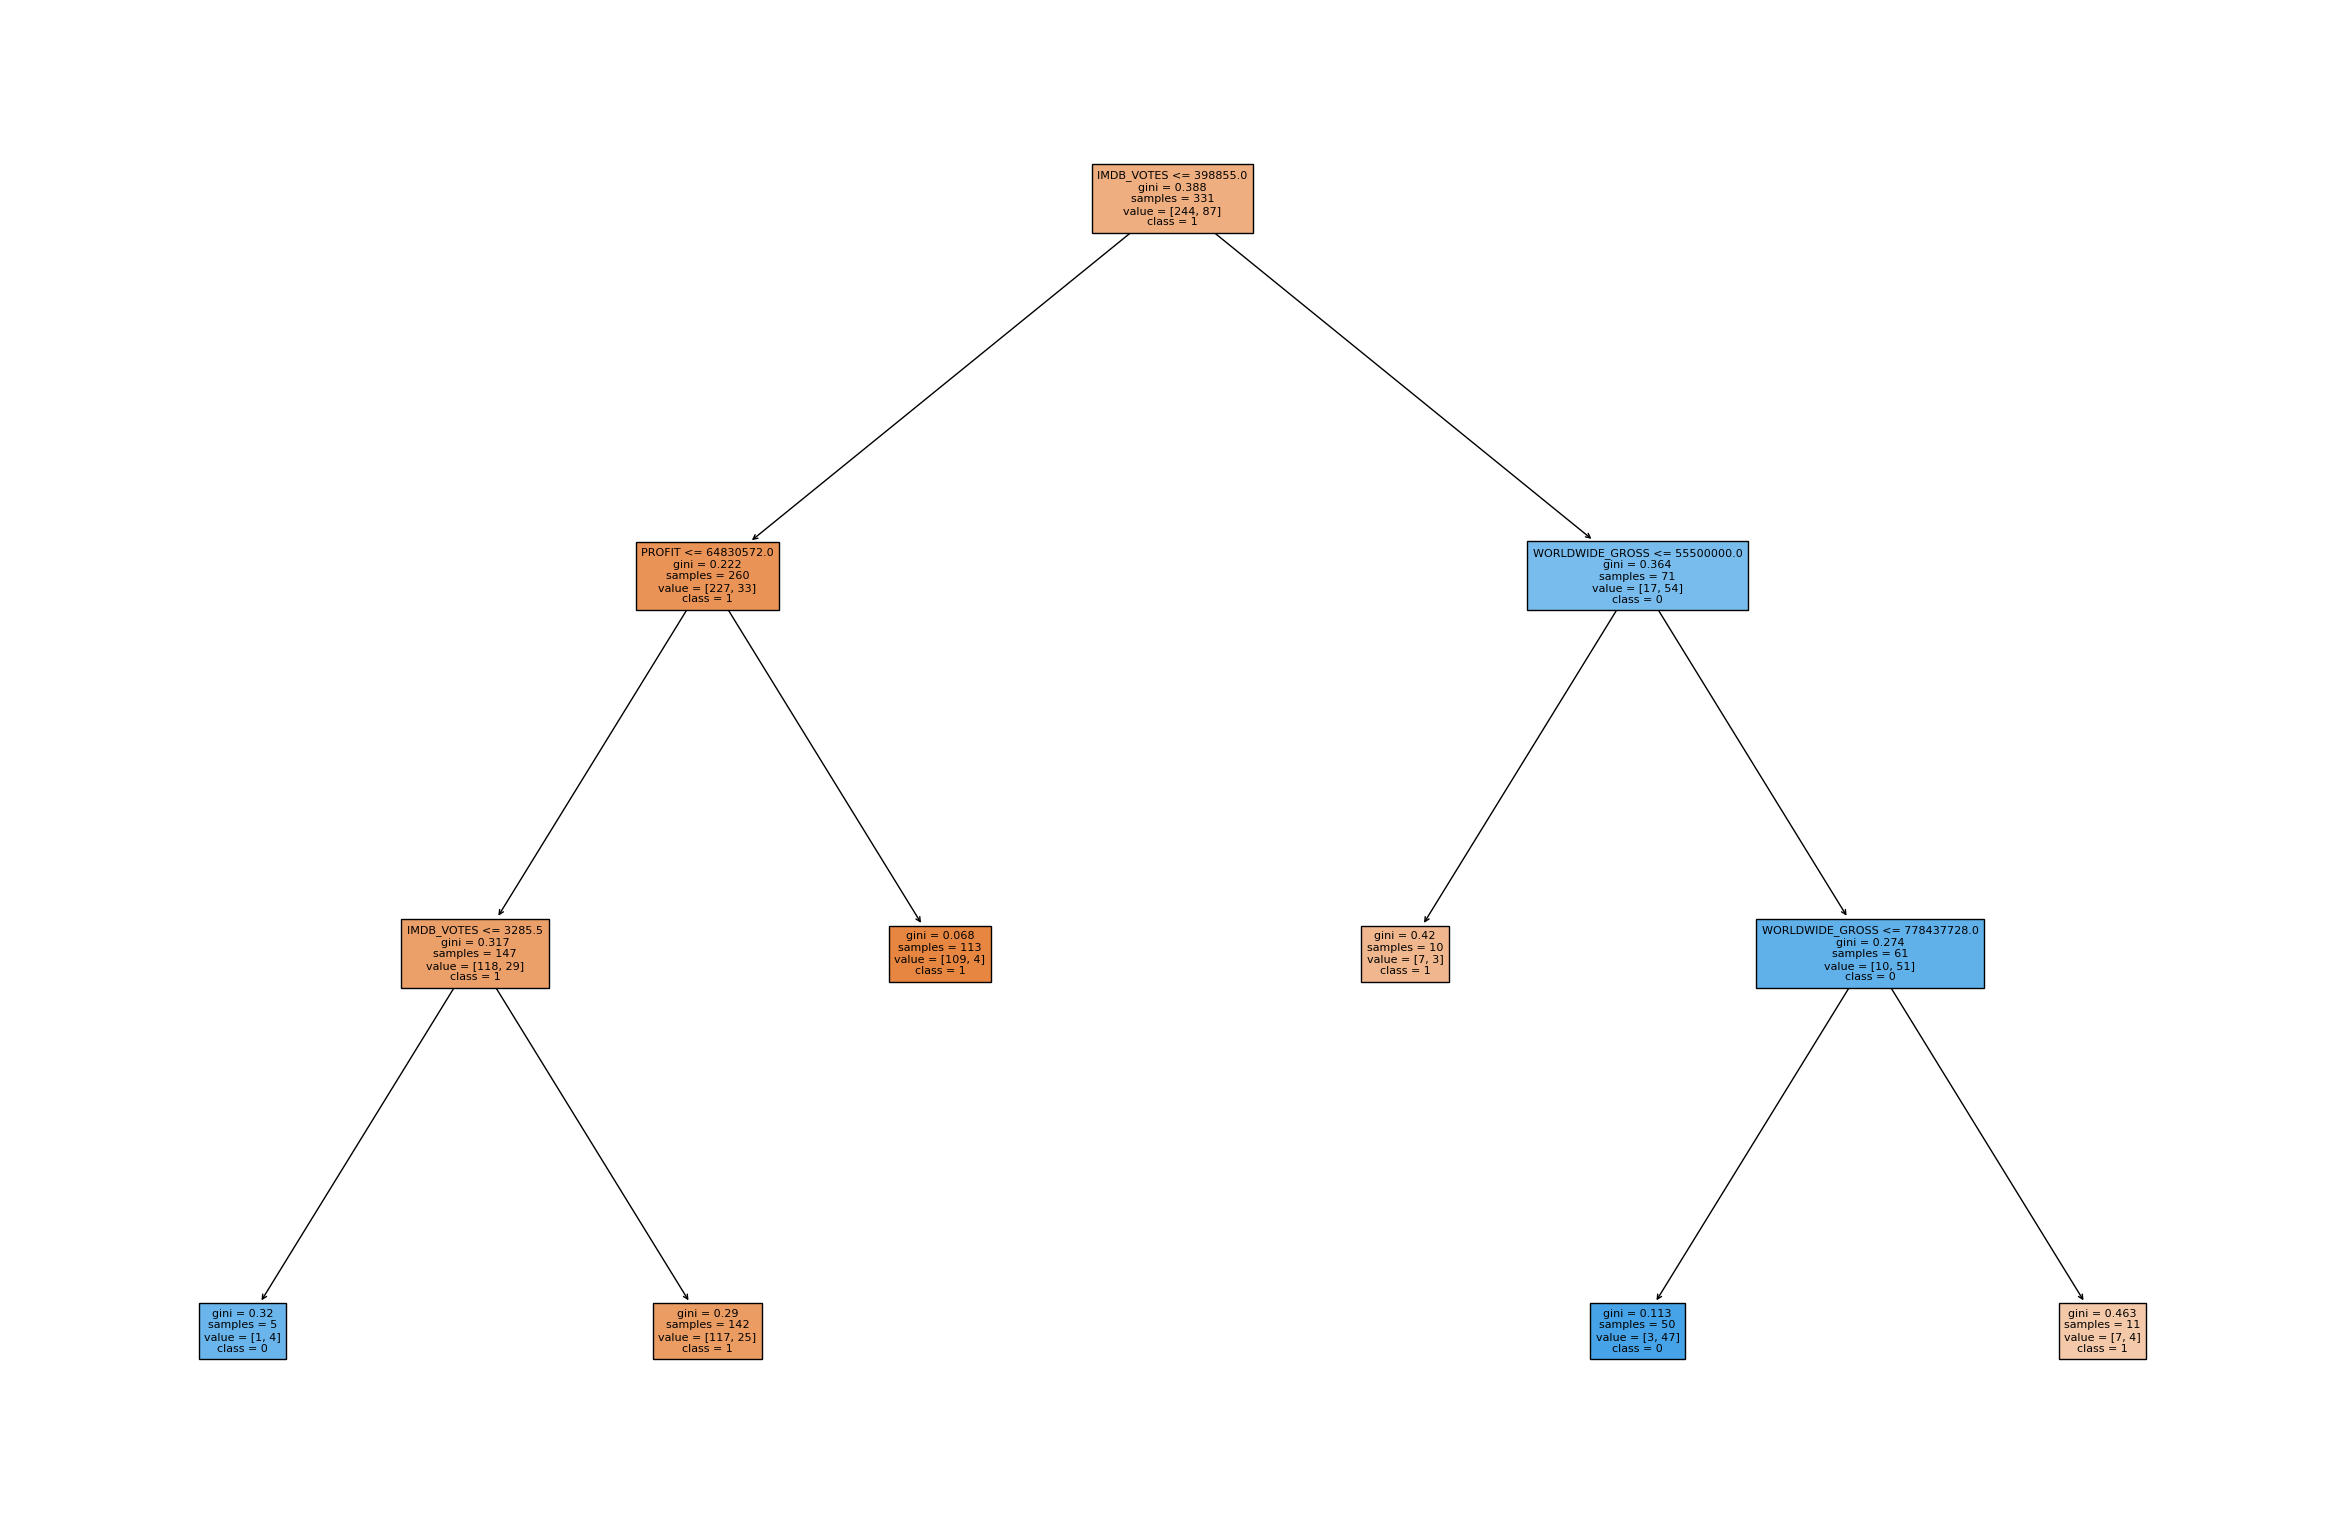

In [57]:
fig = plt.figure(figsize=(30,20), dpi=100)
_ = plot_tree(bestPrecisionTree, 
                feature_names=movies_df.columns,  
                class_names=['1','0'],
                filled=True,
                fontsize=8
             )


# Best Recall tree

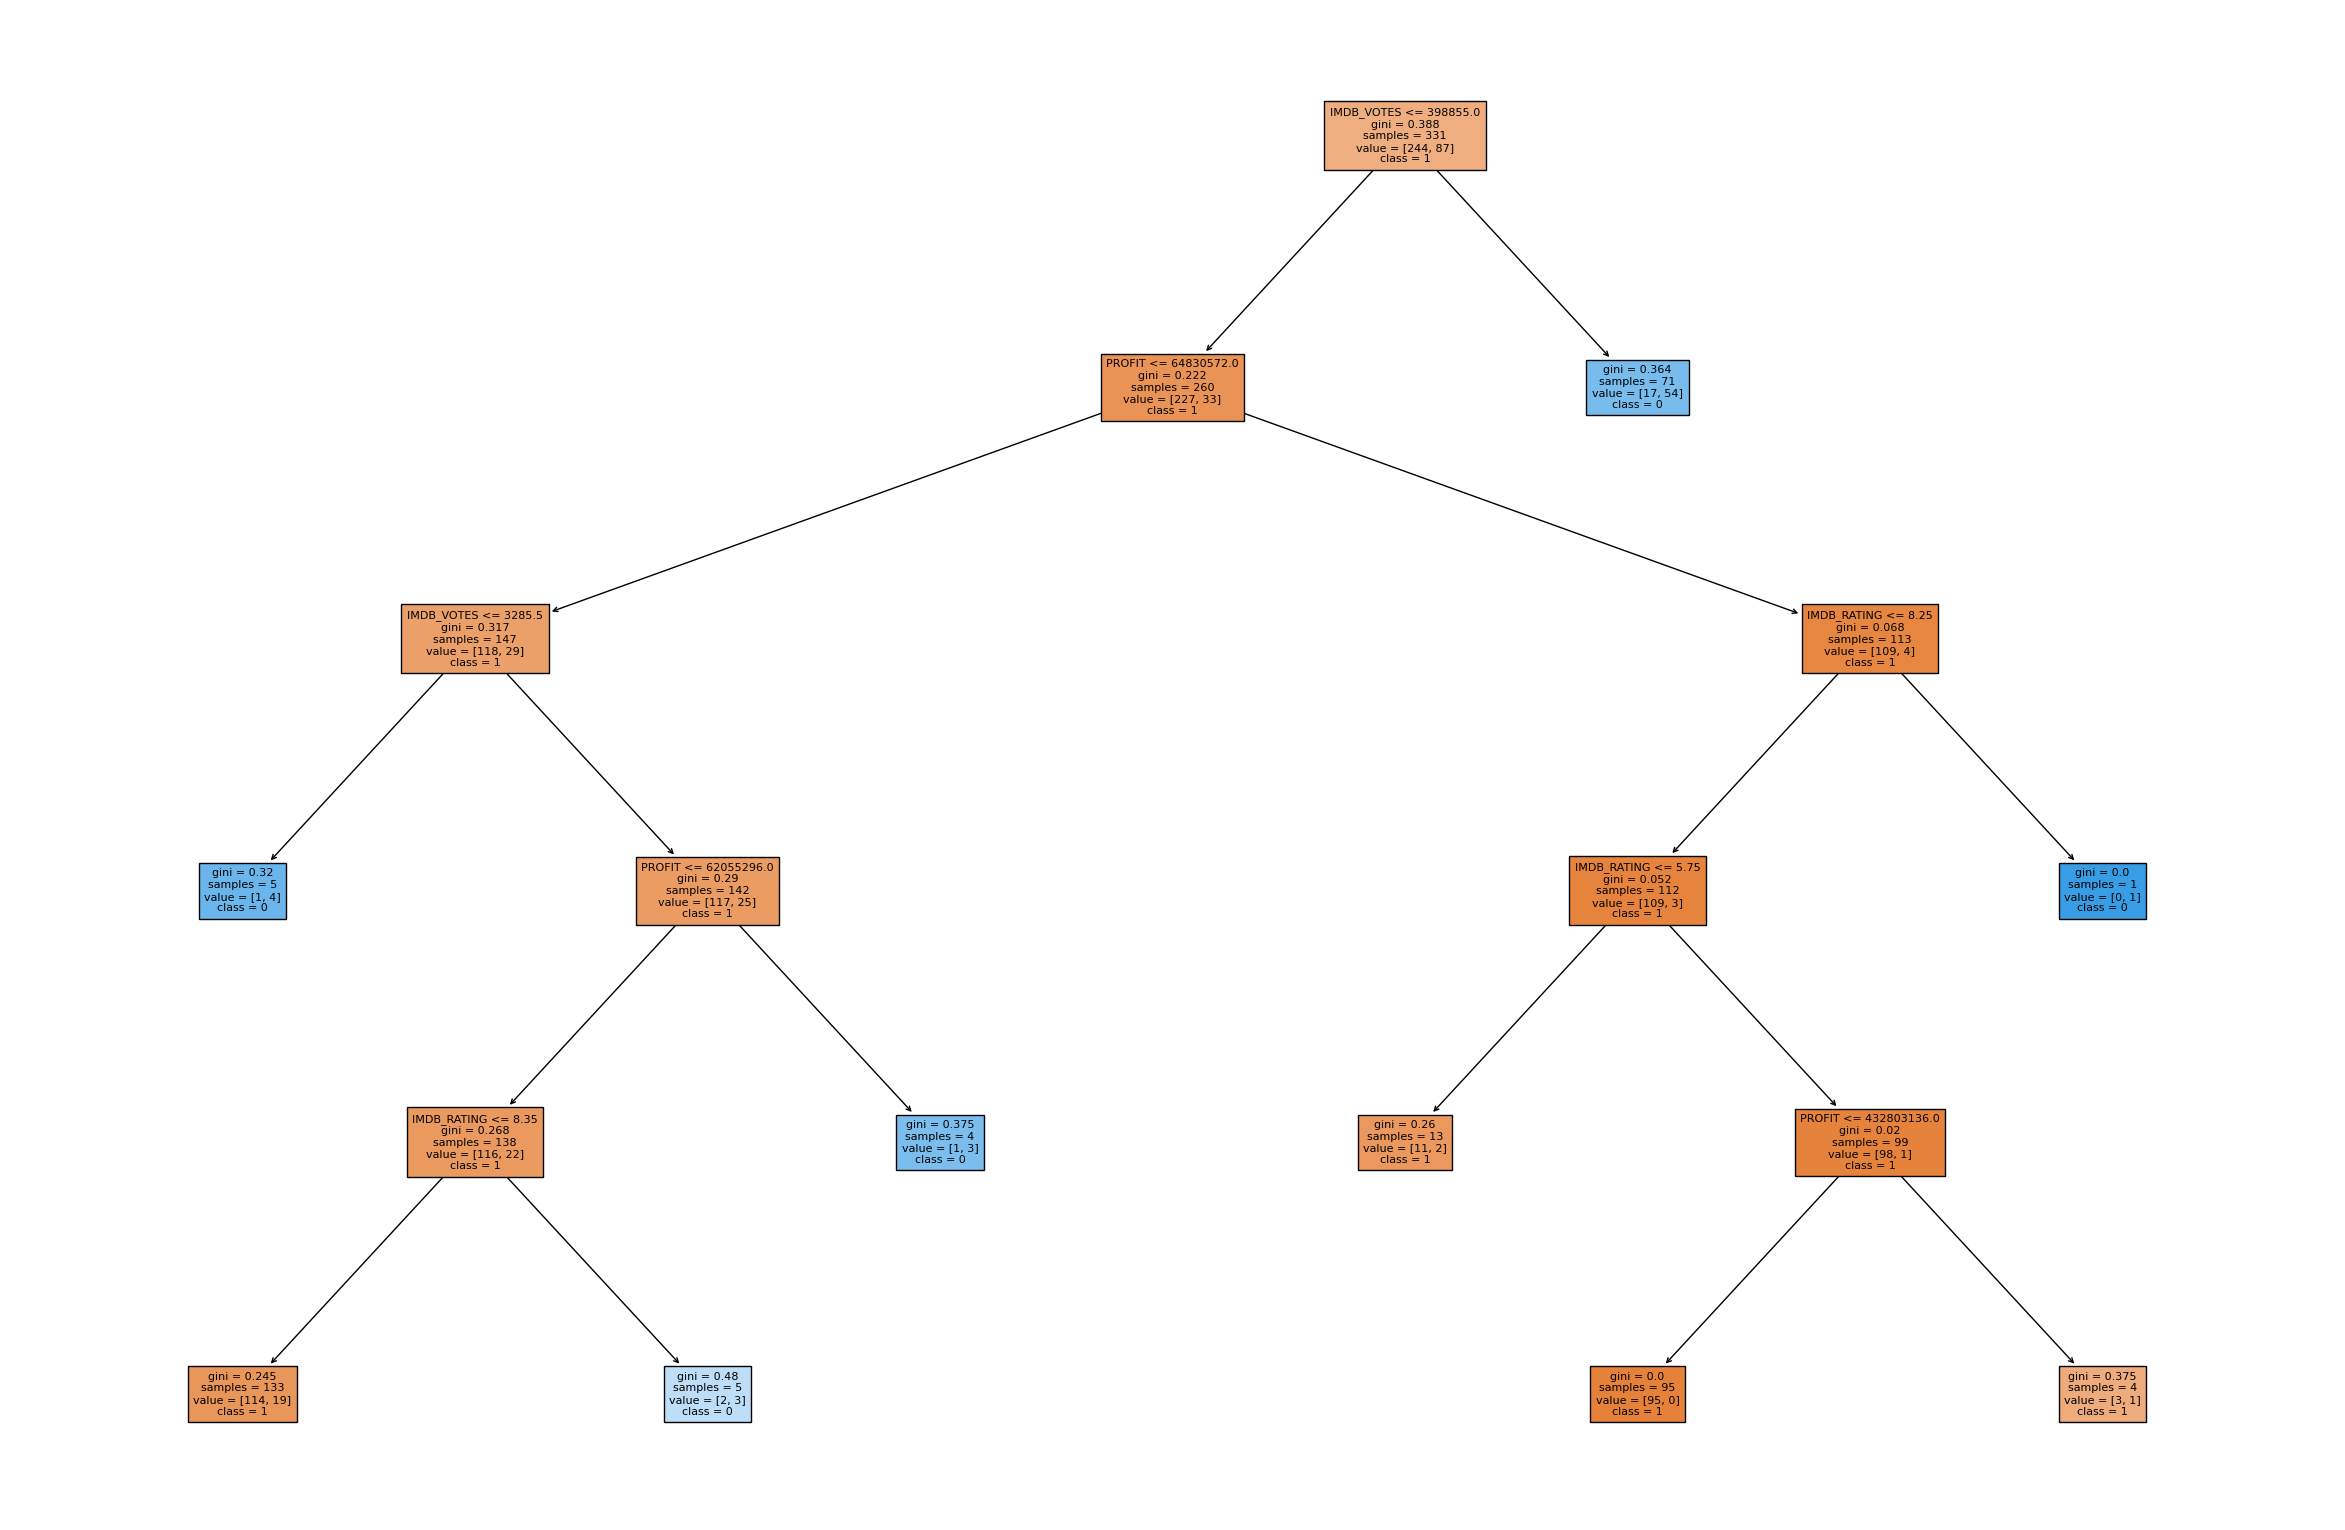

In [58]:
fig = plt.figure(figsize=(30,20), dpi=100)
_ = plot_tree(bestRecallTree, 
                feature_names=movies_df.columns,  
                class_names=['1','0'],
                filled=True,
                fontsize=8
             )

# On  Comparing models with and without k-fold cross verfication  and Hyperparameter tuning

# For KNN Model:

As we can see from the confusion matrix that the values for TP,FP,FN,TN has a lot of difference, we are taking 'f1_score'as it is the most contributing metric.

Initially:
For k-value of 13
f1 is 49.15 %

After hyperparameter testing or k-fold cross verification:
For k-value of 29
 f1 score:  62.08%

# Decision Tree:

For decison tree we can consider Accuracy as confusion matrix is resonable balanced.

Initially:
Accuracy: 73.94 %

After hyperparameter testing or k-fold cross verification:
Accuracy: 85.17 %

Hyperparameter models improved Decision models Accuracy

Decision tree model which we had already identified as better model with 73.94 % accuray, the accuracy went by 11.23 %